# Entrega da A2 da disciplina de Programação Linear e Inteira

Integrantes:

- Edilton Brandão
- Pedro Garcia
- Lucas Westfal

A modelagem dos problemas abaixo foi feita nas listas e na prova da disciplina. O presente trabalho busca apenas resolvê-los computacionalmente.

Para auxiliar nas resoluções, utilizamos o JuMP e implementamos uma função "PLI" que recebe os dados do problema (função objetivo, variáveis, restrições) matricialmente. A sintaxe tradicional do JuMP também foi utilizada em alguns problemas. As soluções indicam o tipo de método utilizado (alguns problemas foram feitos de ambos os modos).

In [22]:
using LinearAlgebra
using JuMP
using GLPK
using Plots
using Distributions
using Random
pyplot()

Plots.PyPlotBackend()

# Definindo função que resolve problemas genericamente

In [23]:
function PLI(max_min, i, j, weights, A, b, C, d, E, f)
    model = Model(GLPK.Optimizer) # Cria modelo
    p = length(weights)

    # Define variáveis
    @variable(model, x[1:i, 1:j] >= 0)
    x = reshape(x', p, 1)

    # Define restrições
    for l in 1:length(f)
        @constraint(model, (E*x)[l] >= f[l]) # Restrições de desigualdade >=
    end
    for m in 1:length(b)
        @constraint(model, (A*x)[m] == b[m]) # Restrições de igualdade
    end
    for n in 1:length(d)
        @constraint(model, (C*x)[n] <= d[n]) # Restrições de desigualdade <=
    end

    # Define função objetivo
    if max_min == 1
        @objective(model, Max, sum(weights[k] * x[k] for k in 1:p)) # Problema de maximização
    else
        @objective(model, Min, sum(weights[k] * x[k] for k in 1:p)) # Problema de minimização
    end
    
    # Roda a otimização
    optimize!(model)
    
    # Exibe resultados
    println("Função objetivo: ", objective_function(model))
    println()
    println("Valor ótimo: ", objective_value(model))
    println()
    println("Solução ótima:")
    for k in 1:p
        println(x[k], " = ", value(x[k]))
    end
end

PLI (generic function with 1 method)

# Lista 1

## Questão 1
![Questão 1](figs/L1E1.png)

In [24]:
# Problema das usinas da fábrica (Q1-L1)
E = [1 0 0 1 0 0;0 1 0 0 1 0;0 0 1 0 0 1]
f = [100;200;300]
C = [1 1 1 0 0 0;0 0 0 1 1 1]
d = [400;300]
weights = [1 1.5 3.5 2 1 2]
i = 2
j = 3

PLI(0, i, j, weights, 0, 0, C, d, E, f)

Função objetivo: x[1,1] + 1.5 x[1,2] + 3.5 x[1,3] + 2 x[2,1] + x[2,2] + 2 x[2,3]

Valor ótimo: 1000.0

Solução ótima:
x[1,1] = 100.0
x[1,2] = 200.0
x[1,3] = 0.0
x[2,1] = 0.0
x[2,2] = 0.0
x[2,3] = 300.0


## Questão 2
![Questão 1](figs/L1E2.png)

In [25]:
# Problema da usina química (Q2-L1)
C = [1 1;2 3;0 1]
d = [8;19;4]
weights = [7 9]
i = 2
j = 1

PLI(1, i, j, weights, 0, 0, C, d, 0, 0)

Função objetivo: 7 x[1,1] + 9 x[2,1]

Valor ótimo: 62.0

Solução ótima:
x[1,1] = 5.0
x[2,1] = 3.0


## Questão 3
![Questão 1](figs/L1E3.png)

In [26]:
# Problema das usinas de carro (Q3-L1)
E = [1 0 0 1 0 0;0 1 0 0 1 0;0 0 1 0 0 1]
f = [5;4;3]
C = [1 1 1 0 0 0;0 0 0 1 1 1]
d = [6;6]
weights = [38 27 48 37 58 45]
i = 2
j = 3

PLI(0, i, j, weights, 0, 0, C, d, E, f)

Função objetivo: 38 x[1,1] + 27 x[1,2] + 48 x[1,3] + 37 x[2,1] + 58 x[2,2] + 45 x[2,3]

Valor ótimo: 430.0

Solução ótima:
x[1,1] = 2.0
x[1,2] = 4.0
x[1,3] = 0.0
x[2,1] = 3.0
x[2,2] = 0.0
x[2,3] = 3.0


## Questão 4
![Questão 1](figs/L1E4.png)

### Versão 1, em função do tempo

In [27]:
# Problema do sapateiro (Q4-L1) versão 1
model = Model()
set_optimizer(model, GLPK.Optimizer)

# Define as variáveis
@variable(model, x>=0)
@variable(model, y>=0)

# Define as restrições
@constraint(model, x+y<=10)
@constraint(model, 12x+5y<=78)

# Define a função objetivo
@objective(model, Max, 30x+20y)

# Roda a otimização
optimize!(model)

# Exibe os resultados
println("Valor ótimo:   ", objective_value(model))
println("Solução ótima: ", (value.(x), value.(y)))

Valor ótimo:   240.0
Solução ótima: (4.0, 6.0)


### Versão 2, em função dos produtos

In [28]:
# Problema do sapateiro (Q4-L1) versão 2
model = Model()
set_optimizer(model, GLPK.Optimizer)

# Define as variáveis
@variable(model, x>=0)
@variable(model, y>=0)

# Define as restrições
@constraint(model, x/6+y/5<=10)
@constraint(model, 2x+y<=78)

# Define a função objetivo
@objective(model, Max, 5x+4y)

# Roda a otimização
optimize!(model)

# Exibe os resultados
println("Valor ótimo:   ", objective_value(model))
println("Solução ótima: ", (value.(x), value.(y)))

Valor ótimo:   240.0
Solução ótima: (24.0, 29.999999999999996)


### Versão 1, em função do tempo (usando a função PLI)

In [29]:
# Problema do sapateiro (Q4-L1) versão 1
C = [1 1;12 5]
d = [10;78]
weights = [30 20]
i = 2
j = 1

PLI(1, i, j, weights, 0, 0, C, d, 0, 0)

Função objetivo: 30 x[1,1] + 20 x[2,1]

Valor ótimo: 240.0

Solução ótima:
x[1,1] = 4.0
x[2,1] = 6.0


### Versão 2, em função dos produtos (usando a função PLI)

In [30]:
# Problema do sapateiro (Q4-L1) versão 2
C = [1/6 1/5;2 1]
d = [10;78]
weights = [5 4]
i = 2
j = 1

PLI(1, i, j, weights, 0, 0, C, d, 0, 0)

Função objetivo: 5 x[1,1] + 4 x[2,1]

Valor ótimo: 240.0

Solução ótima:
x[1,1] = 24.0
x[2,1] = 29.999999999999996


## Questão 5
![Questão 1](figs/L1E5.png)

### Versão 1

In [31]:
# Problema do combustível para avião (Q5-L1)
model = Model()
set_optimizer(model, GLPK.Optimizer)

# Define as variáveis
@variable(model, x>=0)
@variable(model, y>=0)

# Define as restrições
@constraint(model, 0.25x<=500)
@constraint(model, 0.25x+0.5y<=200)
@constraint(model, 0.5x+0.5y<=200)

# Define a função objetivo
@objective(model, Max, 20x+30y)

# Roda a otimização
optimize!(model)

# Exibe os resultados
println("Valor ótimo:   ", objective_value(model))
println("Solução ótima: ", (value.(x), value.(y)))

Valor ótimo:   12000.0
Solução ótima: (0.0, 400.0)


### Versão 2 (usando a função PLI)

In [32]:
# Problema do combustível para avião (Q5-L1)
C = [0.25 0;0.25 0.5;0.5 0.5]
d = [500;200;200]
weights = [20 30]
i = 2
j = 1

PLI(1, i, j, weights, 0, 0, C, d, 0, 0)

Função objetivo: 20 x[1,1] + 30 x[2,1]

Valor ótimo: 12000.0

Solução ótima:
x[1,1] = 0.0
x[2,1] = 400.0


## Questão 6
![Questão 1](figs/L1E6.png)

In [33]:
# Problema da fábrica de petróleo (Q6-L1)

# Criar o modelo com o solver GLPK
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:4, 1:3] >= 0)  # Quantidade de cada petróleo em cada diesel

d1 = x[1,1] + x[2,1] + x[3,1] + x[4,1]  # Diesel A
d2 = x[1,2] + x[2,2] + x[3,2] + x[4,2]  # Diesel B
d3 = x[1,3] + x[2,3] + x[3,3] + x[4,3]  # Diesel C
d = [d1, d2, d3]

# Função Objetivo: Maximizar o lucro total
@objective(model, Max, 5.5d[1] + 4.5d[2] + 3.5d[3] - (3*(x[1,1] + x[1,2] + x[1,3]) + 6*(x[2,1] + x[2,2] + x[2,3]) + 4*(x[3,1] + x[3,2] + x[3,3]) + 5*(x[4,1] + x[4,2] + x[4,3])))

# Restrições
@constraint(model, x[1,1] + x[1,2] + x[1,3] <= 3000)  # Estoque petróleo 1
@constraint(model, x[2,1] + x[2,2] + x[2,3] <= 2000)  # Estoque petróleo 2
@constraint(model, x[3,1] + x[3,2] + x[3,3] <= 4000)  # Estoque petróleo 3
@constraint(model, x[4,1] + x[4,2] + x[4,3] <= 1000)  # Estoque petróleo 4
@constraint(model, x[1,1] <= 0.3d[1])                # Proporção em diesel A
@constraint(model, x[3,1] <= 0.5d[1])                # Proporção em diesel A
@constraint(model, x[2,1] >= 0.4d[1])                # Proporção em diesel A
@constraint(model, x[2,2] >= 0.1d[2])                # Proporção em diesel B
@constraint(model, x[1,2] <= 0.5d[2])                # Proporção em diesel B
@constraint(model, x[1,3] <= 0.7d[3])                # Proporção em diesel C

# Resolver o modelo
optimize!(model)

# Exibir os resultados
println("Lucro máximo: ", objective_value(model))
println("Quantidades de petróleo para diesel A, B, C:")
for j in 1:3
    println("Diesel ", j, ":")
    for i in 1:4
        println("  Petróleo ", i, ": ", value(x[i,j]))
    end
    println("  Diesel total ", j, ": ", value(d[j]))
end

Lucro máximo: 7166.666666666666
Quantidades de petróleo para diesel A, B, C:
Diesel 1:
  Petróleo 1: 1099.9999999999998
  Petróleo 2: 1466.6666666666665
  Petróleo 3: 1099.9999999999995
  Petróleo 4: 0.0
  Diesel total 1: 3666.6666666666656
Diesel 2:
  Petróleo 1: 1900.0
  Petróleo 2: 533.3333333333334
  Petróleo 3: 2900.0000000000005
  Petróleo 4: 0.0
  Diesel total 2: 5333.333333333334
Diesel 3:
  Petróleo 1: 0.0
  Petróleo 2: 0.0
  Petróleo 3: 0.0
  Petróleo 4: 0.0
  Diesel total 3: 0.0


# Lista 2

## Questão 1
![Questão 1](figs/1eletricidade.png)

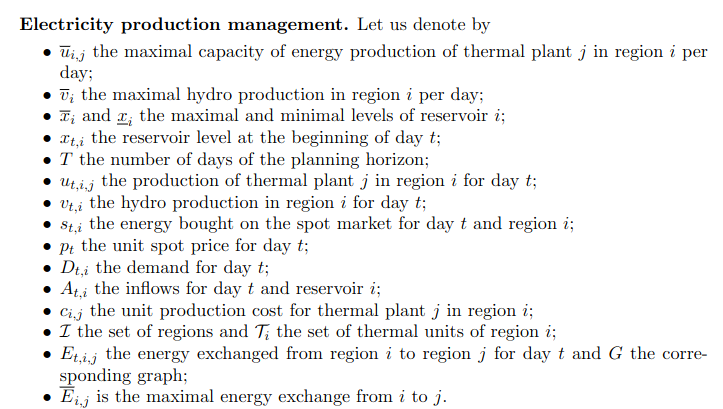

Primeiro, estimamos os coeficientes a serem usados para conseguir um modelo tão próximo como possível da realidade (coeficientes do gabarito disponível no ECLASS):

- $\bar{u}_{i, t}$: capacidade máxima de produção de energia na usina térmica $j$ na região $i$, por dia

Usando dados de: [ANEEL](https://dadosabertos.aneel.gov.br/dataset/empreendimentos-em-operacao). A média de potência instalada em território nacional, considerando todos os tipos de combustível reportados, é de aproximadamente $46239047,31$ kW distribuidos entre $3035$ usinas termoelétricas, com uma média de $365,6$ MW/dia de produção por usina.

Fixemos todas as capacidades de produção nesse valor

- $\bar{v}_i$: capacidade máxima de produção de energia hidrelétria na região$i$, por dia

Usando dados de: [ANEEL](https://dadosabertos.aneel.gov.br/dataset/empreendimentos-em-operacao). A média de potẽncia instalada em território nacional, considerando todos os tipos de combustível reportados, é de aproximadamente $103197797$ kW distribuidos entre $245$ usinas termoelétricas, com uma média de $10109,2$ MW/dia de produção por usina.

- $\bar{x}_i$ e $\underline{x}_i$: níveis máximo e mínimo do reservatório i

Usando estimativa de: [ELETROBRAS](https://www.furnas.com.br/subsecao/129/usina-de-serra-da-mesa?culture=pt)

Os níveis máximos e mínimos de mínimos de um reservatório de usina hidrelétrica são altamente relativos, dependendo das condições geográficas do local usado para instalar a usina. Usando uma estimativa bruta, tomando $\bar{x}_i$ como nível $1$ e $\underline{x}_i$ como sendo o nível mínimo, $0,904$. Todas as usinas do problema terão esses valores como parâmetros.

- $T$: dias de planejamento do modelo

Fixaremos esse valor em 7 para não ficar impossivelmente custoso nas nossas máquinas.

- $p_t$: preço da venda de energia no mercado spot.

Arbitrariamente, fixemos $p_t = 1,2 \forall t$, em fração de preço unitário

- $D_{t,i}$:

Definidos randomicamente abaixo, com média (em valores percentuais) de $360*15/10 = 474.5$ e desvio padrão de $10$, com uma distribuição Gaussiana truncada. 

- $A_{t,i}$: Efluências na região $i$ no tempo $t$

Definidos randomicamente abaixo, com média (em valores percentuais) de $0,01$ e desvio padrão de $0.1$, com uma distribuição Gaussiana truncada. 

- $c_{i, j}$: custo de produção da usina hidrelétrica $j$ da região $i$:

Arbitrariamente, fixemos $c_{i, j} = 0,8 \forall i, j$, em fração de preço unitário

- $\bar{E}_{i, j}$

Arbitrariamente, fixemos $E_{i, j} = 500 \forall i, j$, em MW/dia


No mais, fixemos $i \in {1, 2, 3, 4}$ e 

[0.12979596698125404 0.047856840384075325 0.02552496643177725 0.08202241813280321 0.07167444193105983 0.010428650910449578 0.060030664117868886 0.034933490803382504 0.1776807159148025 0.031099973478096406; 0.15600764147393972 0.10307323496630826 0.11557540679528694 0.18714779164216191 0.08593050719017935 0.11262706957111954 0.08137770813874244 0.003929570423842974 0.06589706878154404 0.18267066415743377; 0.006259896925617505 0.0626993988868204 0.14825987220226253 0.08478773532775159 0.032081326245226034 0.03275923780923381 0.13541502209690873 0.10377516292520221 0.06599848092309513 0.07548603060868243; 0.10548452855545422 0.0006889689185496182 0.1941894255706361 0.07910326846353717 0.07006983743543721 0.23573510919898297 0.13539326397607418 0.17673430374623533 0.06014305826753229 0.07648574277326223]

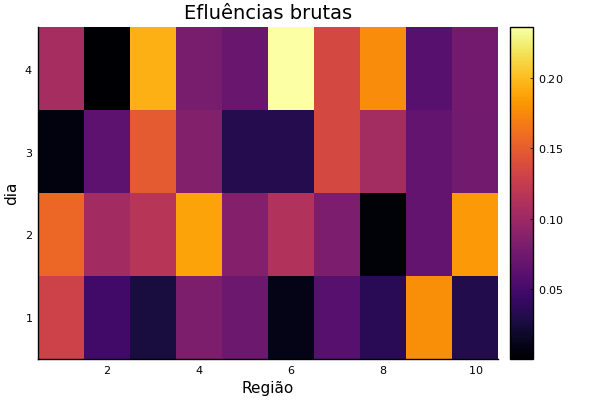

In [34]:
Random.seed!(42)

# Create truncated normal distributions
D_dist = truncated(Normal(474.5, 10), 0, 20000)
A_dist = truncated(Normal(0.01, 0.1), 0, 2)

# Generate samples
D = rand(D_dist, 4, 10)
A = rand(A_dist, 4, 10)

# Taking a look at the data
print(A)
heatmap(A, xlabel="Região", ylabel="dia", title="Efluências brutas")

In [36]:
# Example parameters
T = 7  # Number of days
I = 4  # Number of regions
Ti = 10  # Number of thermal plants in each region

# Maximal capacity of energy production for thermal plants 
u = ones(I, Ti) .* 365.6

# Maximal hydro production for each region
v = ones(I, 1) .* 10109.2

# Maximal and minimal reservoir levels
x_max = ones(I) .* 1
x_min = ones(I) .* 0.904

# Initial reservoir levels
x_start = ones(I).*0.95

# Unit production cost for thermal plants
c = ones(I, Ti)

# Unit spot price for each day
p = ones(T, 1) .* 1.2

# Energy exchange capacity between regions
E_max = ones(I, I) .- Diagonal(ones(I, 1)).*500

# Create a model
model = Model(GLPK.Optimizer)


# Define variables
@variable(model, 0 <= u_t[i=1:I, j=1:Ti, t=1:T] <= u[i, j])
@variable(model, 0 <= v_t[i=1:I, t=1:T] <= v[i])
@variable(model, 0 <= s_t[i=1:I, t=1:T])
@variable(model, x_t[i=1:I, t=1:T+1])
@variable(model, 0 <= E_t[i=1:I, j=1:I, t=1:T] <= E_max[i, j])


# Objective function
@objective(model, Min, sum(c[i, j] * u_t[i, j, t] for i in 1:I, j in 1:Ti, t in 1:T) + sum(s_t[i, t] * p[t] for i in 1:I, t in 1:T))

# Reservoir level dynamics
for i in 1:I, t in 1:T
    @constraint(model, x_t[i, t+1] == x_t[i, t] + 0.8 * A[i, t] - v_t[i, t])
end

# Initial reservoir levels
for i in 1:I
    @constraint(model, x_t[i, 1] == x_start[i])
end

# Supply-demand balance
for i in 1:I, t in 1:T
    @constraint(model, 0.2 * A[i, t] + sum(u_t[i, j, t] for j in 1:Ti) + v_t[i, t] + s_t[i, t] + sum(E_t[i, j, t] for j in 1:I if (j != i)) - sum(E_t[i, j, t] for j in 1:I if (j != i)) >= D[i, t])
end
# Reservoir bounds
for i in 1:I, t in 1:T+1
    @constraint(model, x_min[i] <= x_t[i, t] <= x_max[i])
end

# Solve the problem
optimize!(model)

# Extract and print the results
optimal_u = value.(u_t)
optimal_v = value.(v_t)
optimal_s = value.(s_t)
optimal_x = value.(x_t)
optimal_E = value.(E_t)
total_cost = objective_value(model)

println("Optimal thermal production (u_t): ", optimal_u)
println("Optimal hydro production (v_t): ", optimal_v)
println("Optimal spot market purchases (s_t): ", optimal_s)
println("Optimal reservoir levels (x_t): ", optimal_x)
println("Optimal energy exchanges (E_t): ", optimal_E)
println("Total cost: ", total_cost)

glp_simplex: column 337: lb = 0, ub = -499; incorrect bounds


LoadError: Result index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.

## Questão 2
![Questão 1](figs/2carteiras.png)

Tomemos valores arbitrários para o problema, dado que não há paralelo íntimo com a realidade.

- Total de capital disponível para investimento: M = R$ 1000,00

- Vetor de retornos dos investimentos, conhecidos apriori: $r = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)$

Com investimentos positivos ou nulos em cada categoria. Em código, ficamos com:

In [37]:
using JuMP, GLPK

# Gestão de carteiras. (Q2-L2)

model = Model(GLPK.Optimizer)

# Dados do problema
M = 1000 # Capital disponível
r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # retornos dos investimentos

# Variáveis de decisão
@variable(model, x[1:length(r)] >= 0)

# Define as restrições
@constraint(model, sum(x) <= M)

# Define a função objetivo
@objective(model, Max, sum(r[i] * x[i] for i in 1:length(r)))

# Roda a otimização
optimize!(model)

# Exibe os resultados
println("Valor ótimo:   ", objective_value(model))
println("Solução ótima: ", value.(x))


Valor ótimo:   10000.0
Solução ótima: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000.0]


## Questão 3
![3planificacao.png](figs/3planificacao.png)

In [38]:
# Planificação da expansão da produção (Q3-L2)

model = Model(GLPK.Optimizer)

# Dados do problema
m = 3  # Número de produtos
n = 4  # Número de máquinas
T = 100  # Máximo de horas de revisão
p = [400, 400, 400]  # Custo por unidade não vendida
c = [2.5, 3.75, 5.0, 3.0]  # Custo por hora adicional
h = [500, 500, 500, 500]  # Horas regulares de funcionamento
u = [2000, 2000, 3000, 3000]  # Cota superior de horas
t = [0.08, 0.04, 0.03, 0.01]  # Taxa de revisão por hora

a = [0.6 0.6 0.9 0.8; 
     0.1 0.9 0.6 0.8; 
     0.05 0.2 0.5 0.8]  # Matriz de eficiência de produção

g = [2.6 3.4 3.4 2.5;
     1.5 2.4 2.0 3.6;
     4.0 3.8 3.5 3.2]  # Matriz de custo por hora

d = [1800, 600, 3000]  # Demanda dos produtos

# Variáveis de decisão
@variable(model, h_ij[1:m, 1:n] >= 0)  # Horas de produção de produto i em máquina j
@variable(model, e[1:n] >= 0)          # Horas extras adquiridas para máquina j

# Expressões calculadas
@expression(model, x[i=1:m], sum(a[i,j] * h_ij[i,j] for j in 1:n))  # Produção do produto i
@expression(model, s[i=1:m], d[i]-x[i])  # Demanda não atendida do produto i


# Função Objetivo
@objective(model, Min, sum(c[j] * e[j] for j in 1:n) + 
                       sum(g[i,j] * h_ij[i,j] for i in 1:m, j in 1:n) + 
                       sum(p[i] * s[i] for i in 1:m))


@constraint(model, sum(t[j] * (h[j] + e[j]) for j in 1:n) <= T)  # Limite de tempo de revisão

# Demais restrições
for j in 1:n
    @constraint(model, h[j] + e[j] <= u[j])  # Horas totais disponíveis por máquina
    @constraint(model, sum(h_ij[i,j] for i in 1:m) == h[j] + e[j])  # Horas de produção por máquina
end

# Resolver o modelo
optimize!(model)

# Exibir os resultados
println("Custo mínimo: ", objective_value(model))
for j in 1:n
    println("Máquina ", j, ":")
    println("  Horas extras adquiridas = ", value(e[j]))
    for i in 1:m
        println("  Horas produzindo produto ", i, ": ", value(h_ij[i,j]))
    end
end


Custo mínimo: 896450.0
Máquina 1:
  Horas extras adquiridas = 0.0
  Horas produzindo produto 1: 500.0
  Horas produzindo produto 2: 0.0
  Horas produzindo produto 3: 0.0
Máquina 2:
  Horas extras adquiridas = 0.0
  Horas produzindo produto 1: 0.0
  Horas produzindo produto 2: 500.0
  Horas produzindo produto 3: 0.0
Máquina 3:
  Horas extras adquiridas = 0.0
  Horas produzindo produto 1: 500.0
  Horas produzindo produto 2: 0.0
  Horas produzindo produto 3: 0.0
Máquina 4:
  Horas extras adquiridas = 2000.0
  Horas produzindo produto 1: 2500.0
  Horas produzindo produto 2: 0.0
  Horas produzindo produto 3: 0.0


## Questão 4
![4planificacao.png](figs/4cancelamento.png)

## Questão 5
![3plani.png](figs/5mochila.png)

In [39]:
# Problema da mochila Q5-L2

# Criar o modelo
model = Model(GLPK.Optimizer)

# Dados
utilidades = [10, 20, 15, 40, 30]
pesos = [2, 3, 5, 7, 1]
volumes = [1, 4, 3, 6, 2]
P = 15  # Capacidade máxima de peso
V = 10  # Capacidade máxima de volume

# Número de itens
n = length(utilidades)

# Variáveis de decisão
@variable(model, x[1:n], Bin)  # x[i] é 0 ou 1 (não pegar ou pegar o item i)

# Função objetivo
@objective(model, Max, sum(x[i] * utilidades[i] for i in 1:n))

# Restrições
@constraint(model, sum(x[i] * pesos[i] for i in 1:n) <= P)  # Restrição de peso
@constraint(model, sum(x[i] * volumes[i] for i in 1:n) <= V)  # Restrição de volume

# Resolver o modelo
optimize!(model)

# Exibir os resultados
println("Valor máximo da utilidade: ", objective_value(model))
println("Itens a serem levados na mochila:")
for i in 1:n
    if value(x[i]) > 0.9  # Verifica se o item i deve ser levado
        println("Item $i: Utilidade = $(utilidades[i]), Peso = $(pesos[i]), Volume = $(volumes[i])")
    end
end


Valor máximo da utilidade: 80.0
Itens a serem levados na mochila:
Item 1: Utilidade = 10, Peso = 2, Volume = 1
Item 4: Utilidade = 40, Peso = 7, Volume = 6
Item 5: Utilidade = 30, Peso = 1, Volume = 2


## Questão 6
![3planificacao.png](figs/6unit.png)

In [40]:
# Problema de "Unit commitment" (Q6-L2)

# Criação do modelo
model = Model(GLPK.Optimizer)

# Dados 
n_usinas = 10
n_meses = 12
custos_producao = [5, 8, 6, 7, 9, 10, 12, 4, 11, 15]  # Custo de produção por unidade
custos_fixos = [100, 150, 120, 130, 160, 110, 90, 140, 170, 180]  # Custo fixo para ligar cada usina
demanda = [100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]  # Demanda mensal
K = [100, 200, 150, 180, 250, 120, 90, 160, 220, 230]  # Capacidade máxima de produção

# Variáveis de decisão
@variable(model, y[1:n_meses, 1:n_usinas], Bin)
@variable(model, u[1:n_meses, 1:n_usinas] >= 0)

# Função objetivo
@objective(model, Min, sum(custos_producao[i] * u[t, i] for t in 1:n_meses, i in 1:n_usinas) +
           sum(custos_fixos[i] * (y[t, i] - (t > 1 ? y[t-1, i] : 0)) for t in 1:n_meses, i in 1:n_usinas))

# Restrição de não desligamento após ligação
for t in 2:n_meses
    for i in 1:n_usinas
        @constraint(model, y[t, i] >= y[t-1, i])
    end
end

# Demais estrições
for t in 1:n_meses
    for i in 1:n_usinas
        @constraint(model, u[t, i] <= K[i] * y[t, i])  # Capacidade máxima de produção
    end
    @constraint(model, sum(u[t, i] for i in 1:n_usinas) >= demanda[t])  # Demanda mensal
end

# Resolver o modelo
optimize!(model)

# Exibir resultados
println("Custo total mínimo: ", objective_value(model))
for t in 1:n_meses
    for i in 1:n_usinas
        if value(y[t, i]) > 0.9
            println("Mês $t, Usina $i: Produção = ", value(u[t, i]), ", Estado = Ligada")
        else
            println("Mês $t, Usina $i: Estado = Desligada")
        end
    end
end


Custo total mínimo: 8330.0
Mês 1, Usina 1: Estado = Desligada
Mês 1, Usina 2: Estado = Desligada
Mês 1, Usina 3: Estado = Desligada
Mês 1, Usina 4: Estado = Desligada
Mês 1, Usina 5: Estado = Desligada
Mês 1, Usina 6: Estado = Desligada
Mês 1, Usina 7: Estado = Desligada
Mês 1, Usina 8: Produção = 100.0, Estado = Ligada
Mês 1, Usina 9: Estado = Desligada
Mês 1, Usina 10: Estado = Desligada
Mês 2, Usina 1: Estado = Desligada
Mês 2, Usina 2: Estado = Desligada
Mês 2, Usina 3: Estado = Desligada
Mês 2, Usina 4: Estado = Desligada
Mês 2, Usina 5: Estado = Desligada
Mês 2, Usina 6: Estado = Desligada
Mês 2, Usina 7: Estado = Desligada
Mês 2, Usina 8: Produção = 120.0, Estado = Ligada
Mês 2, Usina 9: Estado = Desligada
Mês 2, Usina 10: Estado = Desligada
Mês 3, Usina 1: Estado = Desligada
Mês 3, Usina 2: Estado = Desligada
Mês 3, Usina 3: Estado = Desligada
Mês 3, Usina 4: Estado = Desligada
Mês 3, Usina 5: Estado = Desligada
Mês 3, Usina 6: Estado = Desligada
Mês 3, Usina 7: Estado = Deslig

# A1

## Questão 1
![image.png](figs/1A1.png)

In [41]:
# Problema da mistura de líquidos (Q1-A1)

# Criar o modelo
model = Model(GLPK.Optimizer)

# Definição das variáveis
@variable(model, x[1:4, 1:3] >= 0)  # Quantidades de líquidos nas misturas
@variable(model, l[1:4] >= 0)       # Quantidades de líquidos vendidos diretamente
@variable(model, p >= 0)            # Quantidade do produto P

# Função objetivo: Maximizar receita - custo
@objective(model, Max, 
    6 * sum(l) + 22 * p + 11 * (sum(x[:, 1])-p/3) + 15 * sum(x[:, 2]) + 14 * (sum(x[:, 3])-2/3 * p) - 
    (5.5 * (sum(x[1, :] .+ l[1])) + 4.5 * (sum(x[2, :] .+ l[2])) + 
    7.5 * (sum(x[3, :] .+ l[3])) + 11.25 * (sum(x[4, :] .+ l[4])))
)

# Restrições de estoque
@constraint(model, sum(x[1, :]) + l[1] <= 8000)
@constraint(model, sum(x[2, :]) + l[2] <= 4250)
@constraint(model, sum(x[3, :]) + l[3] <= 16000)
@constraint(model, sum(x[4, :]) + l[4] <= 2000)

# Composição das misturas
@constraint(model, x[1,1] == 0.3 * sum(x[:,1]))  # Mistura E
@constraint(model, x[2,1] >= 0.1 * sum(x[:,1]))  # Mistura E
@constraint(model, x[3,1] == 0.4 * sum(x[:,1]))  # Mistura E
@constraint(model, x[4,1] <= 0.05 * sum(x[:,1])) # Mistura E

@constraint(model, x[1,2] >= 0.25 * sum(x[:,2])) # Mistura F
@constraint(model, x[2,2] <= 0.2 * sum(x[:,2]))  # Mistura F
@constraint(model, x[3,2] == 0.2 * sum(x[:,2]))  # Mistura F
@constraint(model, x[4,2] >= 0.1 * sum(x[:,2]))  # Mistura F

@constraint(model, x[1,3] == 0.2 * sum(x[:,3]))  # Mistura G
@constraint(model, x[2,3] >= 0.15 * sum(x[:,3])) # Mistura G
@constraint(model, x[3,3] == 0.4 * sum(x[:,3]))  # Mistura G
@constraint(model, x[4,3] <= 0.2 * sum(x[:,3]))  # Mistura G

# Produção mínima das misturas
@constraint(model, sum(x[:,1]) >= 400)
@constraint(model, sum(x[:,2]) >= 800)
@constraint(model, sum(x[:,3]) >= 200)

# Relação para produção de P
@constraint(model, sum(x[:,1]) - p/3 >= 0)
@constraint(model, sum(x[:,3]) - 2/3 * p >= 0)

# Resolver o modelo
optimize!(model)

# Exibir os resultados
println("Lucro máximo: ", objective_value(model))
println("Quantidades de líquidos vendidos diretamente e em misturas:")
for i in 1:4
    println("Líquido ", i, ": vendido diretamente = ", value(l[i]), ", em misturas = ", value(sum(x[i,:])))
end
println("Quantidade de produto P: ", value(p))


Lucro máximo: 290821.42857142864
Quantidades de líquidos vendidos diretamente e em misturas:
Líquido 1: vendido diretamente = 0.0, em misturas = 8000.0
Líquido 2: vendido diretamente = 0.0, em misturas = 4250.0
Líquido 3: vendido diretamente = 0.0, em misturas = 7392.857142857144
Líquido 4: vendido diretamente = 0.0, em misturas = 2000.0
Quantidade de produto P: 15321.428571428576


## Questão 2
![image.png](figs/2A2.png)

In [42]:
# Problema da companhia energética (Q2-A1)
A = [1 0 0 0 0 0 0 0 0;0 1 0 0 1 0 0 1 0;0 0 1 0 0 1 0 0 1]
b = [20;10;30]
C = [1 1 1 0 0 0 0 0 0;0 0 0 0 1 1 0 0 0;0 0 0 0 0 0 0 1 1]
d = [50;20;50]
weights = [50 90 80 0 60 50 0 30 40]
i = 3
j = 3

PLI(0, i, j, weights, 0, 0, C, d, A, b)

Função objetivo: 50 x[1,1] + 90 x[1,2] + 80 x[1,3] + 60 x[2,2] + 50 x[2,3] + 30 x[3,2] + 40 x[3,3]

Valor ótimo: 2500.0

Solução ótima:
x[1,1] = 20.0
x[1,2] = 0.0
x[1,3] = 0.0
x[2,1] = 0.0
x[2,2] = 0.0
x[2,3] = 0.0
x[3,1] = 0.0
x[3,2] = 10.0
x[3,3] = 30.0
